# Basic Data Analysis with Python Guided project
## Mission:
* __Walking through data analysis with Python without the use of Pandas library__
### Project Name:
> __Exploring gun deaths in the US__

### Dataset details:
* __Source__: The dataset came from [FiveThirtyEight](https://www.fivethirtyeight.com) and can be found [here](https://github.com/fivethirtyeight/guns-data)

* __About__:
>The dataset is stored in the `guns.csv` file<br>
>It contains information on gun deaths in the US from `2012` to `2014`<br>
>Each row in the dataset represents a single fatality.<br>
>The columns contain demographic and other information about the victim.<br>
>A total of 100798 rows.<br>
>**To learn more about the dataset click [here](https://github.com/fivethirtyeight/guns-data)**

* __Data Dictionary__:

><ul>
<li><code></code> -- this is an identifier column, which contains the row number.  It's common in CSV files to include a unique identifier for each row, but we can ignore it in this analysis.</li>
<li><code>year</code> -- the year in which the fatality occurred.</li>
<li><code>month</code> -- the month in which the fatality occurred.</li>
<li><code>intent</code> -- the intent of the perpetrator of the crime.  This can be <code>Suicide</code>, <code>Accidental</code>, <code>NA</code>, <code>Homicide</code>, or <code>Undetermined</code>.</li>
<li><code>police</code> -- whether a police officer was involved with the shooting.  Either <code>0</code> (false) or <code>1</code> (true).</li>
<li><code>sex</code> -- the gender of the victim.  Either <code>M</code> or <code>F</code>.</li>
<li><code>age</code> -- the age of the victim.</li>
<li><code>race</code> -- the race of the victim.  Either <code>Asian/Pacific Islander</code>, <code>Native American/Native Alaskan</code>, <code>Black</code>, <code>Hispanic</code>, or <code>White</code>.</li>
<li><code>hispanic</code> -- a code indicating the Hispanic origin of the victim.</li>
<li><code>place</code> -- where the shooting occurred.  Has several categories, which you're encouraged to explore on your own.</li>
<li><code>education</code> -- educational status of the victim.  Can be one of the following:<ul>
<li><code>1</code> -- Less than High School</li>
<li><code>2</code> -- Graduated from High School or equivalent</li>
<li><code>3</code> -- Some College</li>
<li><code>4</code> -- At least graduated from College</li>
<li><code>5</code> -- Not available</li>
</ul>
</li>
</ul>


### Specific Objective:
    In this project, we'll explore the dataset, and try to find patterns in the demographics of the victims.

__Action__: *Read in the dataset as list*

In [1]:
import csv
f = open('gun_death_full_data.csv')
data = list(csv.reader(f))

__Action__: *View your data*

In [2]:
print(data[:5])

[['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education'], ['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', 'BA+'], ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', 'Some college'], ['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', 'BA+'], ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', 'BA+']]



<h1> Question  #1: </h1>

<b>From the above output, what did you notice?</b>

    put your answer in the cell below

__*Here's the answer:*__

    The data is a list of list

    The list at index 0 contains the header row


__Action__: *Seperate the header from the data*

In [3]:
header = data[0]
data = data[1:]

__Action__: *Review your new data*

In [4]:
print(data[:5])

[['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', 'BA+'], ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', 'Some college'], ['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', 'BA+'], ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', 'BA+'], ['5', '2012', '02', 'Suicide', '0', 'M', '31', 'White', '100', 'Other specified', 'HS/GED']]


*The `year` column contains information on the year in which gun deaths occurred. <br>
We can use this column to calculate how many gun deaths happened in each year.*

__To do__:
>Counting guns death by year

__Action:__ *extract the year column*

In [5]:
# list comprehension is used here, to learn about it, check the next cell 
years = [row[1] for row in data]

###  \*\*\*__Note:__ List comprehension was used above, to learn about it click [here](https://www.datacamp.com/community/tutorials/python-list-comprehension)

__Action__: *obtain the number of year counts*

In [6]:
#create a dictionary, then keeping count in the dictionary of how many times each element occurs in the year column.
year_counts = {}
for year in years:
    if year in year_counts: year_counts[year]+= 1
    else: year_counts[year] = 1    

__Action:__ *Display `year_counts` to see how many gun deaths occur in each year.*

In [7]:
year_counts

{'2012': 33563, '2013': 33636, '2014': 33599}

__To do:__
> Exploring gun death by months and year

*It looks like the number of gun deaths are very close for each year <br>
Let's see if gun deaths in the US change by month and year.<br>
In order to do this, we'll have to create a [`datetime.datetime`](https://docs.python.org/3/library/datetime.html#datetime-objects) object*


__Action:__ *Import `datetime` module*

In [8]:
import datetime

In [9]:
# check the docstring for datetime class in the datetime module
datetime.datetime?

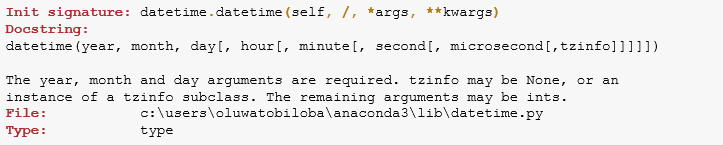

__Action:__ *convert year and month column to `datetime` type*

In [10]:
# We'll specify a fixed day because day is not included in the data and it's a required argument
dates = [datetime.datetime(year=int(row[1]),month=int(row[2]),day=1)  for row in data]

__Action__: *View the `datetime` object created*

In [11]:
dates[:5]

[datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 2, 1, 0, 0),
 datetime.datetime(2012, 2, 1, 0, 0)]


__Question  #2: __

Obtain the number of gun death for each month

    put your answer in the cell below

__*Here's the answer:*__

    dates_counts = {}
    for date in dates:
        if date in dates_counts: dates_counts[date] += 1
        else: dates_counts[date] = 1



In [14]:
dates_counts

{datetime.datetime(2012, 1, 1, 0, 0): 2758,
 datetime.datetime(2012, 2, 1, 0, 0): 2357,
 datetime.datetime(2012, 3, 1, 0, 0): 2743,
 datetime.datetime(2012, 4, 1, 0, 0): 2795,
 datetime.datetime(2012, 5, 1, 0, 0): 2999,
 datetime.datetime(2012, 6, 1, 0, 0): 2826,
 datetime.datetime(2012, 7, 1, 0, 0): 3026,
 datetime.datetime(2012, 8, 1, 0, 0): 2954,
 datetime.datetime(2012, 9, 1, 0, 0): 2852,
 datetime.datetime(2012, 10, 1, 0, 0): 2733,
 datetime.datetime(2012, 11, 1, 0, 0): 2729,
 datetime.datetime(2012, 12, 1, 0, 0): 2791,
 datetime.datetime(2013, 1, 1, 0, 0): 2864,
 datetime.datetime(2013, 2, 1, 0, 0): 2375,
 datetime.datetime(2013, 3, 1, 0, 0): 2862,
 datetime.datetime(2013, 4, 1, 0, 0): 2798,
 datetime.datetime(2013, 5, 1, 0, 0): 2806,
 datetime.datetime(2013, 6, 1, 0, 0): 2920,
 datetime.datetime(2013, 7, 1, 0, 0): 3079,
 datetime.datetime(2013, 8, 1, 0, 0): 2859,
 datetime.datetime(2013, 9, 1, 0, 0): 2742,
 datetime.datetime(2013, 10, 1, 0, 0): 2808,
 datetime.datetime(2013, 11,

__To Do:__
>exploring gun death by sex and race

__Action:__ *Obtain the number of death per sex and for each race*

In [12]:
# Count up how many times each item in both column occurs.
sex_counts = {}
race_counts = {}
sex_race_combined = [(row[5],row[7]) for row in data] # tuple unpacking is used here, to learn it, check the next cell
for sex, race in sex_race_combined:
    if sex in sex_counts: sex_counts[sex] += 1
    else: sex_counts[sex] = 1
    if race in race_counts: race_counts[race] += 1
    else: race_counts[race] = 1

###  \*\*\*__Note:__ tuple unpacking was used inside the list comprehension above, to learn about it click [here](https://chrisalbon.com/python/basics/unpacking_a_tuple/)

__Action:__ *Display number of gun death by sex*

In [13]:
sex_counts

{'F': 14449, 'M': 86349}

__Action:__ *Display the number of gun death by race*

In [14]:
race_counts

{'Asian/Pacific Islander': 1326,
 'Black': 23296,
 'Hispanic': 9022,
 'Native American/Native Alaskan': 917,
 'White': 66237}

__To Do:__
> Obtain the categories of place shooting occured

__Action__: *obtain the place column and get the unique value in the column*

In [15]:
places = [row[-2] for row in data]
set(places)

{'Farm',
 'Home',
 'Industrial/construction',
 'NA',
 'Other specified',
 'Other unspecified',
 'Residential institution',
 'School/instiution',
 'Sports',
 'Street',
 'Trade/service area'}

In [16]:
# get the docstring for the set function
set?

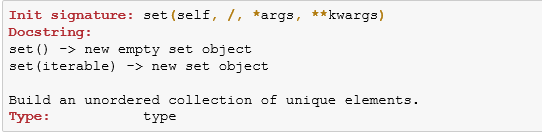

__Question  #3:__

Obtain the number of gun death occured at each place

    put your answer in the cell below


__*Your answer is below:*__

    places_counts = {}
    for place in places:
        if place in places_counts: places_counts[place] += 1
        else: places_counts[place] = 1





__Question  #4:__ 

Which place has the lowest and highest recorded number of gun death?

What can you write down about `NA`, `Other specified`, `Other unspecified`?

    put your answer in the cell below

__Your answer is below:__

> ## Which place has the lowest and highest recorded number of gun death?
    highest: Home
    lowest: Sports

> ## What can you write down about `NA`, `Other specified`, `Other unspecified`?
    `NA` means not available, i.e the column was left empty for that particular record
    `Other specified` may means other categories not included in the `place` column which was specified by the informant of that record
    `Other unspecified` may means other categories not included in the `place` column which was not specified by the informant of that record
 



 __Question  #5:__

Display the different unique age of those victim recorded?

    put your answer in the cell below

__Your answer is below:__

    ages = [row[-5] for row in data]
    print(set(age))


*From your output above, you can noticed that `0` is part of the age <br>
This is unreasonable, we can conclude that age `0` should be consider as age `1`*


__To Do:__
> Add age `0` and age `1` values together as same in a dictionary

__Action:__ *Obtain the number of age counts*

In [17]:
ages = [row[-5] for row in data]
age_counts = {}
for age in ages:
    if age in age_counts: age_counts[age] += 1
    else: age_counts[age] = 1

__Action:__ *View the age counts*

In [18]:
age_counts

{'0': 33,
 '1': 38,
 '10': 53,
 '100': 1,
 '101': 2,
 '102': 2,
 '107': 1,
 '11': 61,
 '12': 117,
 '13': 229,
 '14': 364,
 '15': 561,
 '16': 864,
 '17': 1185,
 '18': 1753,
 '19': 2065,
 '2': 50,
 '20': 2219,
 '21': 2504,
 '22': 2712,
 '23': 2472,
 '24': 2437,
 '25': 2230,
 '26': 2231,
 '27': 2070,
 '28': 1986,
 '29': 1955,
 '3': 66,
 '30': 1869,
 '31': 1833,
 '32': 1824,
 '33': 1700,
 '34': 1699,
 '35': 1631,
 '36': 1512,
 '37': 1500,
 '38': 1491,
 '39': 1389,
 '4': 54,
 '40': 1414,
 '41': 1485,
 '42': 1492,
 '43': 1527,
 '44': 1449,
 '45': 1372,
 '46': 1437,
 '47': 1532,
 '48': 1621,
 '49': 1669,
 '5': 43,
 '50': 1674,
 '51': 1755,
 '52': 1715,
 '53': 1708,
 '54': 1684,
 '55': 1596,
 '56': 1625,
 '57': 1472,
 '58': 1510,
 '59': 1430,
 '6': 50,
 '60': 1361,
 '61': 1306,
 '62': 1099,
 '63': 1041,
 '64': 1126,
 '65': 1039,
 '66': 998,
 '67': 865,
 '68': 868,
 '69': 879,
 '7': 43,
 '70': 883,
 '71': 791,
 '72': 736,
 '73': 737,
 '74': 671,
 '75': 676,
 '76': 582,
 '77': 575,
 '78': 598,
 

__Action__: *Remove the value of age `0` and add it to that of age `1`*

In [19]:
age_zero_value = age_counts.pop('0') # pop builtin function was used here, check its docstring in the cell below
age_counts['1'] = age_counts['1'] + age_zero_value

In [20]:
age_counts.pop?

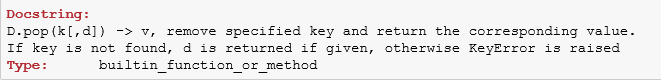

__Action:__ *Review the age counts for the change*

In [21]:
age_counts

{'1': 71,
 '10': 53,
 '100': 1,
 '101': 2,
 '102': 2,
 '107': 1,
 '11': 61,
 '12': 117,
 '13': 229,
 '14': 364,
 '15': 561,
 '16': 864,
 '17': 1185,
 '18': 1753,
 '19': 2065,
 '2': 50,
 '20': 2219,
 '21': 2504,
 '22': 2712,
 '23': 2472,
 '24': 2437,
 '25': 2230,
 '26': 2231,
 '27': 2070,
 '28': 1986,
 '29': 1955,
 '3': 66,
 '30': 1869,
 '31': 1833,
 '32': 1824,
 '33': 1700,
 '34': 1699,
 '35': 1631,
 '36': 1512,
 '37': 1500,
 '38': 1491,
 '39': 1389,
 '4': 54,
 '40': 1414,
 '41': 1485,
 '42': 1492,
 '43': 1527,
 '44': 1449,
 '45': 1372,
 '46': 1437,
 '47': 1532,
 '48': 1621,
 '49': 1669,
 '5': 43,
 '50': 1674,
 '51': 1755,
 '52': 1715,
 '53': 1708,
 '54': 1684,
 '55': 1596,
 '56': 1625,
 '57': 1472,
 '58': 1510,
 '59': 1430,
 '6': 50,
 '60': 1361,
 '61': 1306,
 '62': 1099,
 '63': 1041,
 '64': 1126,
 '65': 1039,
 '66': 998,
 '67': 865,
 '68': 868,
 '69': 879,
 '7': 43,
 '70': 883,
 '71': 791,
 '72': 736,
 '73': 737,
 '74': 671,
 '75': 676,
 '76': 582,
 '77': 575,
 '78': 598,
 '79': 573,

__Action:__ *Review race counts and sex counts obtained earlier*

In [22]:
print(sex_counts)
race_counts

{'M': 86349, 'F': 14449}


{'Asian/Pacific Islander': 1326,
 'Black': 23296,
 'Hispanic': 9022,
 'Native American/Native Alaskan': 917,
 'White': 66237}

__To Do:__
> Obtain the number of death recorded for male, white race

In [23]:
# loop over the tuple  and check whether the sex is Male and the race is White
male_white_counts = 0
for sex, race in sex_race_combined:
    if sex == 'M' and race == 'White': male_white_counts += 1

In [24]:
print('The number of fatality the involved a white male US citizen is', male_white_counts)

The number of fatality the involved a white male US citizen is 55550


*__Almost half of the fatality recorded involved a white male victim__*

 __Question  #6:__

Obtain the number of fatality that is accidental and involved a police officer?

Write a comment about your answer

    put your answer in the cell below

__Check the answer here:__



> ### obtain the  different categories for the intent column
intent = [row[3] for row in data]
set(intent)

> ### obtain the police column
is_police = [row[4] for row in data]

> ### combined the intent and police column for each row
police_intent_combined = [(row[4],row[3]) for row in data]

> ### check wheter a police is involved for every accidental case
accidental_discharge = 0
for pol,intent in police_intent_combined:
    if pol == '1' and intent == 'Accidental':
        accidental_discharge += 1

> ### Comment
No police officer is involved in any accidental gun death 




__To Do__:
> Does gun death peaks or decline with seasons?

__Action:__ *Review the dates column extracted earlier*

In [25]:
dates[:5]

[datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 2, 1, 0, 0),
 datetime.datetime(2012, 2, 1, 0, 0)]

__Action:__ *Get the number of fatality for each season(summer and winter)*
#### \*\*\*Note: summer is from June 21 - Sept 23; winter is from Dec 21 - Mar 20

In [26]:
summer_counts, winter_counts = 0,0
for date in dates:
    if date.month in range(6,10):
        summer_counts += 1
    if date.month in [12,1,2,3]:
        winter_counts += 1

In [27]:
'summer counts:{}, winter counts:{}'.format(summer_counts,winter_counts)

'summer counts:34957, winter counts:32068'

__Gun deaths peaks up in the summer than the winter but there appears to be a minor seasonal correlation, with gun deaths peaking in the summer and declining in the winter.__

__To Do__:
>__What is the rate of gun deaths per `100,000` people of each race?__

*To achieve this, the data must be related to the population distribution of the US*

__Action:__ *import US census data* (the dataset is included with this notebook)

In [28]:
census = list(csv.reader(open('census.csv')))
print(census)

[['Id', 'Year', 'Id', 'Sex', 'Id', 'Hispanic Origin', 'Id', 'Id2', 'Geography', 'Total', 'Race Alone - White', 'Race Alone - Hispanic', 'Race Alone - Black or African American', 'Race Alone - American Indian and Alaska Native', 'Race Alone - Asian', 'Race Alone - Native Hawaiian and Other Pacific Islander', 'Two or More Races'], ['cen42010', 'April 1, 2010 Census', 'totsex', 'Both Sexes', 'tothisp', 'Total', '0100000US', '', 'United States', '308745538', '197318956', '44618105', '40250635', '3739506', '15159516', '674625', '6984195']]


__Action:__ *Extract the racial category of the census dataset*

In [29]:
census_counts = {}
for idx,col in enumerate(census[0][10:16], 10): # enumerate function, check its docstring in the next cell
    census_counts[col] = census[1][idx]

In [30]:
enumerate?

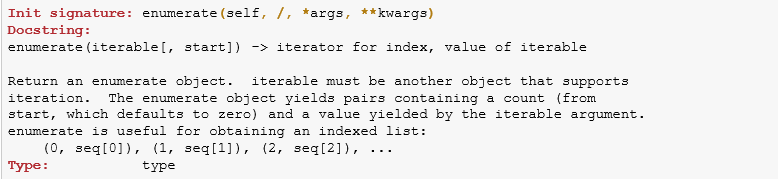

__Action:__ *View the racial category obtained*

In [31]:
census_counts

{'Race Alone - American Indian and Alaska Native': '3739506',
 'Race Alone - Asian': '15159516',
 'Race Alone - Black or African American': '40250635',
 'Race Alone - Hispanic': '44618105',
 'Race Alone - Native Hawaiian and Other Pacific Islander': '674625',
 'Race Alone - White': '197318956'}

*We can notice that the racial categories are named slightly differently in census and in data.*

*We'll need to manually construct a dictionary that allows us to map between them, and perform the division.*

In [32]:
key = list(race_counts.keys())
key

['Asian/Pacific Islander',
 'White',
 'Native American/Native Alaskan',
 'Black',
 'Hispanic']

<p>Here's a list of the race name in <code>data</code>, and the corresponding race name in <code>census</code>:</p>
<ul>
<li><code>Asian/Pacific Islander</code> -- <code>Race Alone - Asian</code> plus <code>Race Alone - Native Hawaiian and Other Pacific Islander</code>.</li>
<li><code>Black</code> -- <code>Race Alone - Black or African American</code>.</li>
<li><code>Hispanic</code> -- <code>Race Alone - Hispanic</code></li>
<li><code>Native American/Native Alaskan</code> -- <code>Race Alone - American Indian and Alaska Native</code></li>
<li><code>White</code> -- <code>Race Alone - White</code></li>
</ul>

In [33]:
mapping = {
    key[0]:15159516+674625,
    key[1]:197318956,
    key[2]:3739506,
    key[3]:40250635,
    key[4]:44618105
}

In [34]:
mapping

{'Asian/Pacific Islander': 15834141,
 'Black': 40250635,
 'Hispanic': 44618105,
 'Native American/Native Alaskan': 3739506,
 'White': 197318956}

The mathematical equation to compute the rate of gun death per race is<br>
$$ 
rate = \frac{\text{gun death recorded for the race}}{\text{population of the race}} 
$$

#### \*\*\*Note: The mathematical equation above was written with LaTex, click [here](https://www.overleaf.com/latex/templates/a-quick-guide-to-latex/fghqpfgnxggz#.W4KjmOhKi02) for a quick guide

__Action:__ *compute the rate per `100,000` per race*

In [35]:
race_per_hundredk = {key:(value/mapping[key])*100000 for key,value in race_counts.items()}

#### \*\*\*Note: dictionary comphrension was used above, learn more about it [here](https://www.datacamp.com/community/tutorials/python-dictionary-comprehension)

__Action:__ *View your result*

In [36]:
race_per_hundredk

{'Asian/Pacific Islander': 8.374309664161762,
 'Black': 57.8773477735196,
 'Hispanic': 20.220491210910907,
 'Native American/Native Alaskan': 24.521955573811088,
 'White': 33.56849303419181}

* __Interpretation/Implication of our results__:
> About `8` of every `100,000` Asians are involved in gun death<br>
> Almost `58` of every `100,000` Black<br>
> About `20` of every `100,000` Hispanic<br>
> Almost `25` of every `100,000` Native America<br>
> Nearly `34` of every `100,000` White

__To Do:__
> What is the correlation of different categories of gun death with gender, race or age 

__Action__:*Obtain the different categories of gun death*

In [37]:
intents = [row[3] for row in data]
set(intents)

{'Accidental', 'Homicide', 'NA', 'Suicide', 'Undetermined'}

__Action__: *What is the number of counts per intent*

 __Question  #7:__

Obtain the number of counts per intent?

Write a comment on your result


    put your answer in the cell below


__Check the solution below:__

    intents_counts = {}
    for intent in intents:
        if intent in intents_counts:
            intents_counts[intent] += 1
        else: intents_counts[intent] = 1
    


In [41]:
intents_counts

{'Accidental': 1639,
 'Homicide': 35176,
 'NA': 1,
 'Suicide': 63175,
 'Undetermined': 807}

*From our result above, we can conclude*
>Suicide related gun death takes the lead,<br>
>Then follow by homicide by almost half of its value<br>
>The value for accidental is relatively low

__To Do:__
>what the gun-related murder rate per `100,000` people in each racial category is?

__Action:__ *Obtain the race column*

In [42]:
races = [row[7] for row in data]

__Action__: *Obtain the number of `Homicide` case per race*

In [43]:
homicide_race_counts = {}
for i,race in enumerate(races):
    # first, create each race in the dictionary
        if race not in homicide_race_counts:
            homicide_race_counts[race] = 0
            # check if the case is homicide
        if intents[i] == 'Homicide':
            homicide_race_counts[race] += 1
    

__Action:__ *View the result*

In [44]:
homicide_race_counts

{'Asian/Pacific Islander': 559,
 'Black': 19510,
 'Hispanic': 5634,
 'Native American/Native Alaskan': 326,
 'White': 9147}

__Action__: *What is the total number of homicide cases*

In [45]:
homicide_total = sum(homicide_race_counts.values())
homicide_total

35176

 __Question  #8:__

**Obtain the number of `Suicide` cases per race?**

**What is the total `Suicide` case recorded?**


    put your answer in the cell below

__Check the solution below:__


> #### Obtain the number of `Suicide` cases per race?
    suicide_race_counts = {}
    for i,race in enumerate(races):
            if race not in suicide_race_counts:
                suicide_race_counts[race] = 0
            if intents[i] == 'Suicide':
                suicide_race_counts[race] += 1
> #### What is the total `Suicide` case recorded?
    sum(suicide_race_counts.values())



__To Do:__
>What is the percentage of black homicide case out of the homicide

__Action:__ *Create a function that find the percentage of the first input in the second*

Learn more about function [here](https://chrisalbon.com/python/basics/function_basics/)

In [46]:
def percent(x,y):
    rst = (x/y)*100.0
    return '{:.2f}%'.format(rst) # or use round function

__Action__: *Get the value of homicide that involved black*

In [47]:
homicide_black = homicide_race_counts.get('Black')

__Action:__ *Get the percentage*

In [48]:
black_percent = percent(homicide_black,homicide_total)
print('The percentage of black homicide '
      'case out of the homicide is',black_percent) 

The percentage of black homicide case out of the homicide is 55.46%


*From our result, it show that more than half of homicide case involve a `Black` despite that half of all the gun death involved a `white`*

\*\*__This call for action__

__Action:__ *Obtain the proportion of death a `Black` is involved* 

In [49]:
cases_by_black = {}
for i, intent in enumerate(intents):
    if intent not in cases_by_black:
        cases_by_black[intent] = 0
    if races[i] == 'Black':
        cases_by_black[intent] += 1
cases_by_black

{'Accidental': 328,
 'Homicide': 19510,
 'NA': 0,
 'Suicide': 3332,
 'Undetermined': 126}

__Action:__ *Get the percentage of death that involved `Black` and is `Homicide`*

In [50]:
black_and_homicide = cases_by_black.get('Homicide')
black_total = sum(cases_by_black.values())
print('The percentage of black homicide case out '
      'of the case that involved black is',
     percent(black_and_homicide,black_total))


The percentage of black homicide case out of the case that involved black is 83.75%


__Action:__ *Get the murder rate per `100,000` people in each racial category*

In [51]:
race_per_hundredk = {}
for k,v in homicide_race_counts.items():
    race_per_hundredk[k] = round((v / mapping[k]) * 100000,2)

race_per_hundredk

{'Asian/Pacific Islander': 3.53,
 'Black': 48.47,
 'Hispanic': 12.63,
 'Native American/Native Alaskan': 8.72,
 'White': 4.64}

*It is seen that nearly `50` out of`100,000` black were murdered*

__To Do__:
> How many black women are murdered out of `100,000` black?

__Action__: *Obtain the number of female that are murdered per race*

In [52]:
sex = [row[5] for row in data]
homicide_race_counts_f = {}
for i,race in enumerate(races):
    # first, create each race in the dictionary
        if race not in homicide_race_counts_f:
            homicide_race_counts_f[race] = 0
            # check if the case is homicide
        if intents[i] == 'Homicide' and sex[i] == 'F':
            homicide_race_counts_f[race] += 1
    

In [53]:
homicide_race_counts_f

{'Asian/Pacific Islander': 140,
 'Black': 1898,
 'Hispanic': 695,
 'Native American/Native Alaskan': 60,
 'White': 2580}

__Action:__ *Percentage of female black out of black murdered?*

In [54]:
per_f_hom = (percent(
    homicide_race_counts_f.get('Black'),
    homicide_race_counts.get('Black')))
per_f_hom

'9.73%'

__Action:__ * Get the number of black women murdered out of `50` black?*

In [55]:
float(per_f_hom.replace('%',''))/100 * 50

4.865

*About `5` out of the `50` are female*

### Further step

<p>Here are some potential next steps:</p>
<ul>
<li>Figure out the link, if any, between month and homicide rate.</li>
<li>Explore the homicide rate by gender.</li>
<li>Explore the rates of other intents, like <code>Accidental</code>, by gender and race.</li>
<li>Find out if gun death rates correlate to location and education.</li>
</ul>

### New to data science and start [here](https://www.dataschool.io/start/)